#Data Visualization in Python using Matplotlib

##Step-by-step guide — Visualizing the Iris dataset with Matplotlib (Python)

###1) Setup: install & import

Goal: Get all libraries for Data Wrangling and Visualization
You'll need pandas for data manipulation, matplotlib.pyplot for plotting, numpy to convert target array to categorical list and sklearn.datasets to easily load the Iris dataset.

In [2]:
# (if needed)
#pip install matplotlib seaborn pandas numpy

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# only in Jupyter
%matplotlib inline                          



###2) Prepare the Iris dataset

Goal: load data as a DataFrame.

The load_iris() function returns a Bunch object, which we'll convert into a Pandas DataFrame for easier manipulation and plotting. We also add the species names as a separate column.

In [4]:
# Load the dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column. The target is an array of 0s, 1s, and 2s.
# We map these to the actual species names (Setosa, Versicolor, Virginica).
df['species'] = pd.Series(iris.target).apply(lambda x: iris.target_names[x])

# Display the first few rows to verify
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


###3) Quick data check (inspect)

Goal: understand columns, types, missing values, basic stats.

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

##4) Separate Data by Species

Goal: Classify species of Iris Flower for comparasion
Since the dataset contains three species, for comparision we first filter the DataFrame into three separate ones.

In [6]:
# Filter dataframes for each species
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

##5) Visualize distribution of Single variable — Histogram

Goal: see distribution of petal_length.

To visualize the distribution of a single feature across all species, histograms are useful. Let's look at the distribution of sepal length.

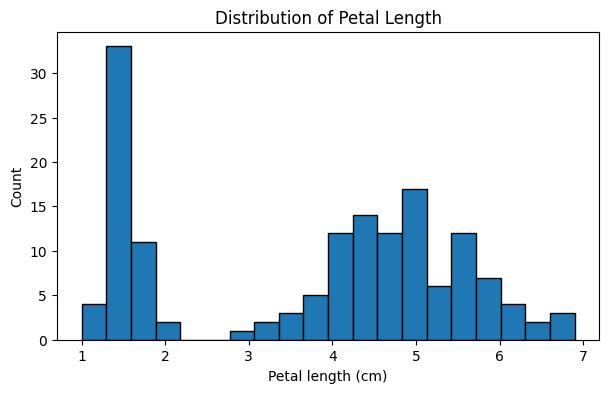

In [7]:
#Prepare Histogram of Petal Length
plt.figure(figsize=(7,4))
plt.hist(df['petal length (cm)'], bins=20, edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.show()

#Similarly we can prepare Histogram of Petal Width, Sepal Length and Sepal Width

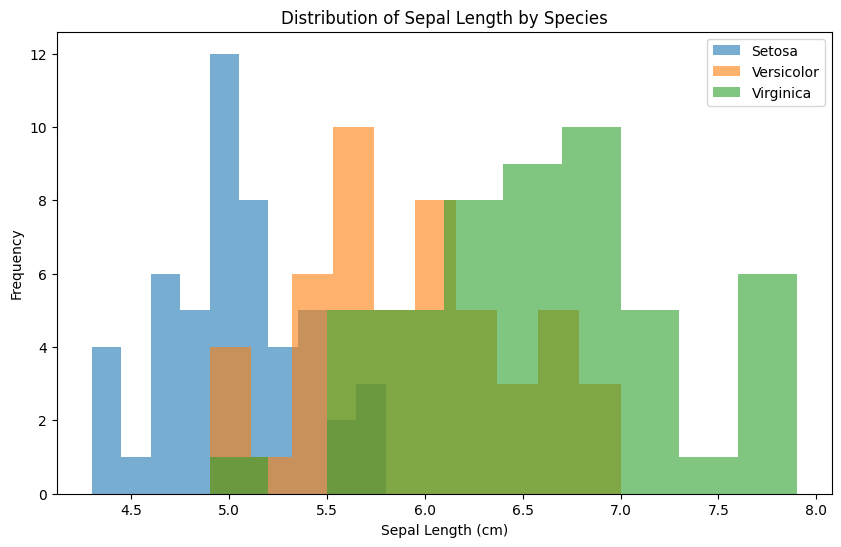

In [8]:
#Prepare Histogram of Petal Length of all three species
plt.figure(figsize=(10, 6))

# Plot histograms for 'sepal length (cm)' for each species
plt.hist(setosa['sepal length (cm)'], bins=10, alpha=0.6, label='Setosa')
plt.hist(versicolor['sepal length (cm)'], bins=10, alpha=0.6, label='Versicolor')
plt.hist(virginica['sepal length (cm)'], bins=10, alpha=0.6, label='Virginica')

# Set plot title and labels
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

###6) Two-variable relationship — scatter plot

Goal: inspect relationship between sepal_length and sepal_width.

A scatter plot is excellent for visualizing the distribution and separation of the three species based on two features. Let's plot sepal length vs. sepal width.

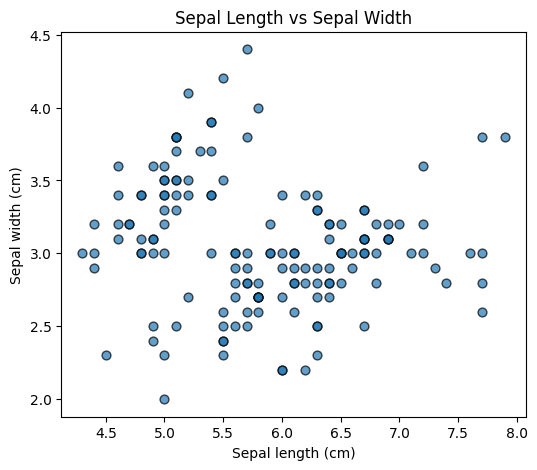

In [9]:
#Scatterplot of sepal length to sepal width
plt.figure(figsize=(6,5))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=40, edgecolors='k', alpha=0.7)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

#Similarly we can plot scatterplot of petal length to petal width

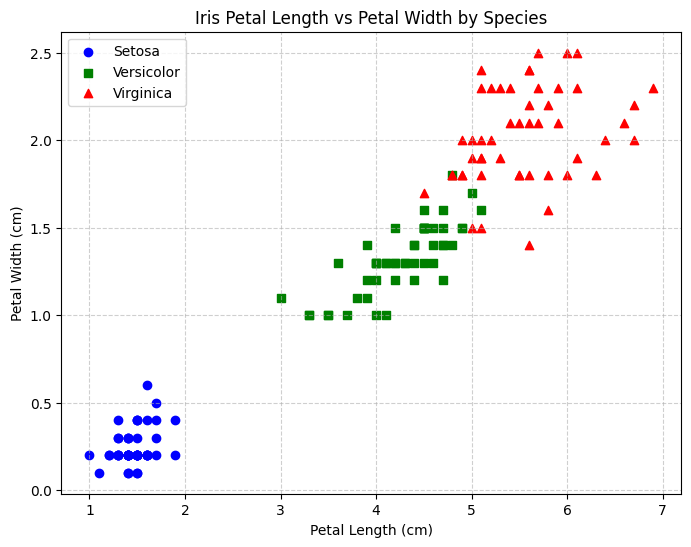

In [10]:
# We use plt.subplots() to create a figure and a set of axes, which gives us more control over the plot elements.
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for each species
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'],
           label='Setosa', marker='o', color='blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'],
           label='Versicolor', marker='s', color='green') # 's' is a square marker
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'],
           label='Virginica', marker='^', color='red') # '^' is a triangle marker

# Set plot title and labels
ax.set_title('Iris Petal Length vs Petal Width by Species')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Add a legend
ax.legend(loc='upper left')

# Add grid lines for readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

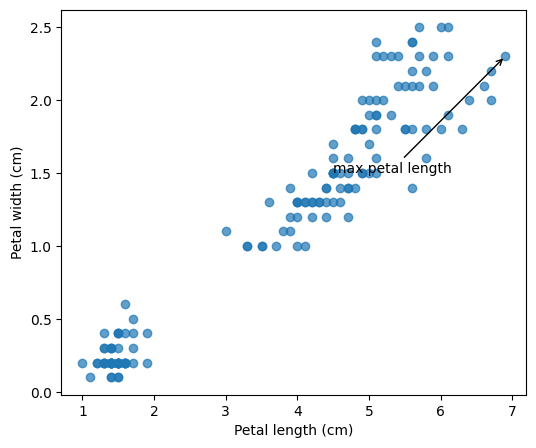

In [11]:
#Annotate interesting points - Max petal length point
#Goal: highlight or label specific datapoints in a scatter.

plt.figure(figsize=(6,5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], alpha=0.7)
# Annotate the max petal_length point
idx = df['petal length (cm)'].idxmax()
plt.annotate('max petal length',
             xy=(df.loc[idx,'petal length (cm)'], df.loc[idx,'petal width (cm)']),
             xytext=(4.5, 1.5),
             arrowprops=dict(arrowstyle='->'))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()


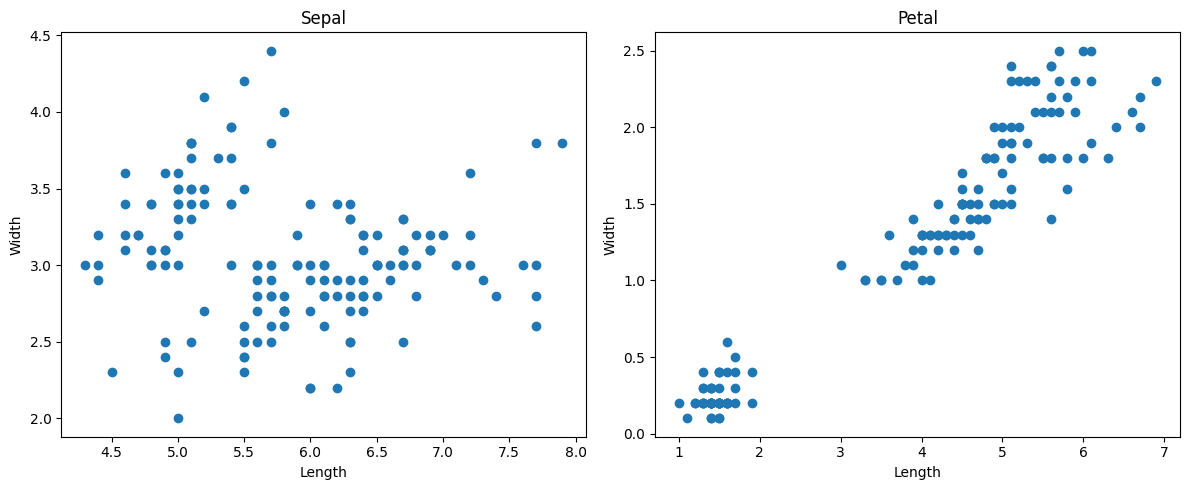

In [12]:
#Multi-panel figure (combine plots)
#Goal: put related plots side-by-side for comparison

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'])
ax[0].set_title('Sepal')
ax[0].set_xlabel('Length'); ax[0].set_ylabel('Width')

ax[1].scatter(df['petal length (cm)'], df['petal width (cm)'])
ax[1].set_title('Petal')
ax[1].set_xlabel('Length'); ax[1].set_ylabel('Width')

plt.tight_layout()
plt.show()


###7) Box Plots for Feature Comparison
Goal: compare distributions across species for a single feature.

Box plots (or box-and-whisker plots) are excellent for visualizing the distribution, central tendency (median), and variability (IQR) of a numerical feature for each categorical group. We can use them to compare the features across the three Iris species.

<Figure size 800x500 with 0 Axes>

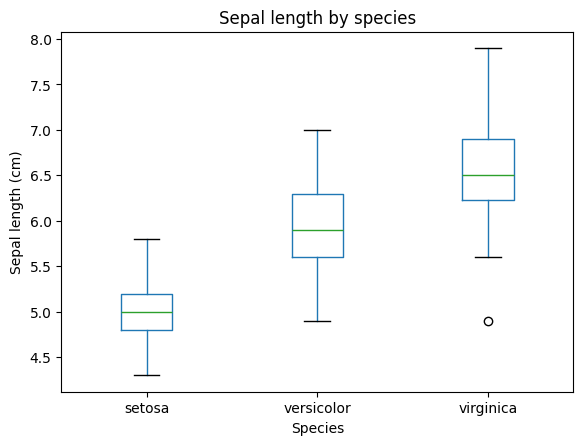

In [13]:
plt.figure(figsize=(8,5))
df.boxplot(column='sepal length (cm)', by='species', grid=False)
plt.title('Sepal length by species')
plt.suptitle('')   # remove automatic subtitle
plt.xlabel('Species')
plt.ylabel('Sepal length (cm)')
plt.show()


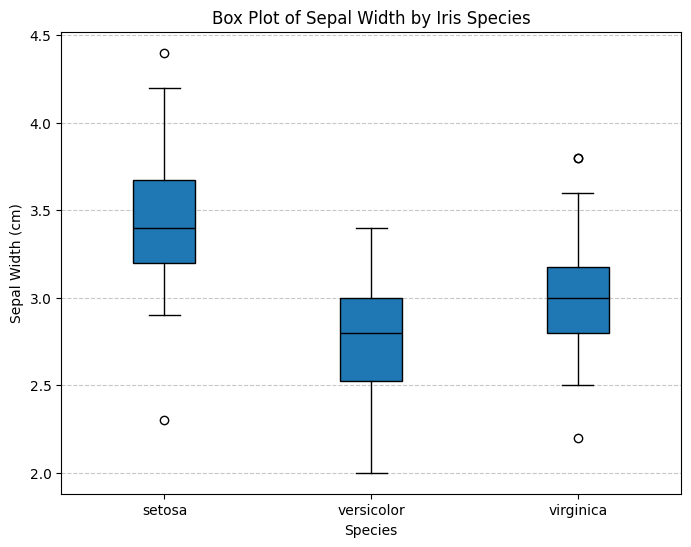

In [14]:
# Box Plot of Sepal Width by Species (using Matplotlib raw)
# 1. Prepare data for plotting
# Create a list of sepal width data, grouped by species
sepal_width_data = [
    df[df['species'] == 'setosa']['sepal width (cm)'],
    df[df['species'] == 'versicolor']['sepal width (cm)'],
    df[df['species'] == 'virginica']['sepal width (cm)']
]

# 2. Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# The boxplot function takes a list of arrays (one for each box)
ax.boxplot(sepal_width_data, patch_artist=True,  # Fill boxes with color
           medianprops={'color': 'black'})     # Style the median line

# 3. Customize the plot
ax.set_xticklabels(df['species'].unique())
ax.set_title('Box Plot of Sepal Width by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Display the plot
plt.show()


Observation: A box plot clearly shows that Iris-setosa generally has a larger sepal width compared to the other two species, with its box positioned higher on the y-axis.

###8) Violin Plot (Alternative to BoxPlot)
Goal: show KDE + distribution shape per species

The violin plot visualizes the distribution of Petal Length for each species, combining the information of a box plot with a kernel density estimate.

Here we shall be using (matplotlib via seaborn).

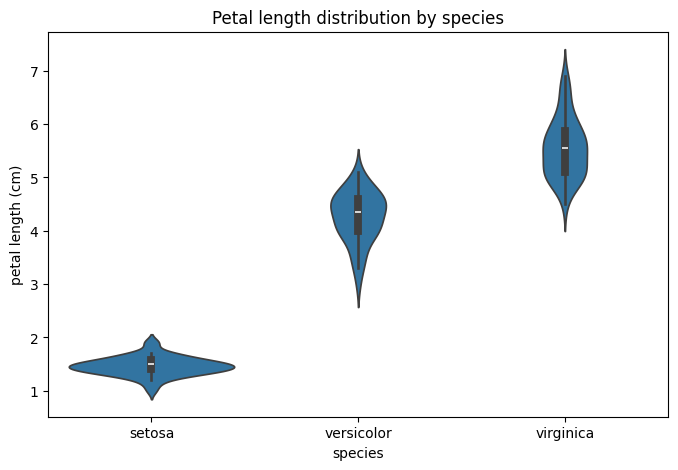

In [15]:
import seaborn as sns
# Generating Violin Plot (basic)
plt.figure(figsize=(8,5))
sns.violinplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal length distribution by species')
plt.show()



C:\Users\jpdob\AppData\Local\Temp\ipykernel_314788\276711104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


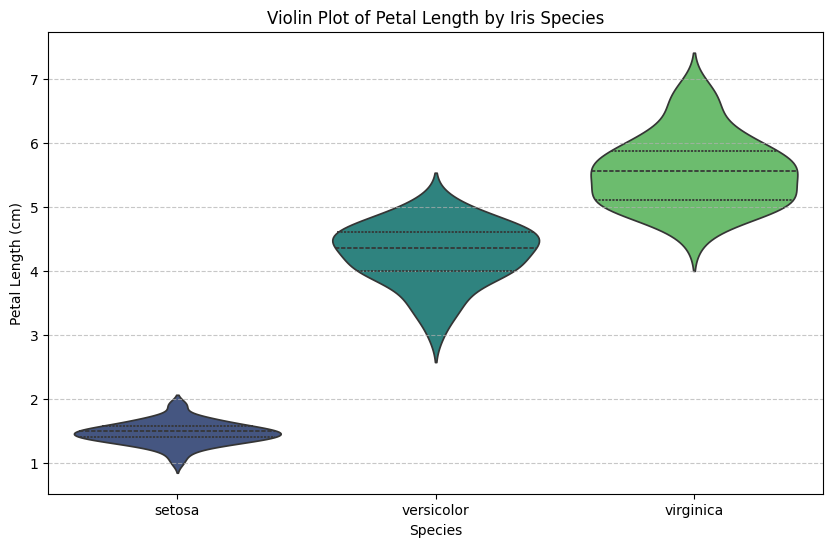

In [16]:
#Generating Violin Plot with better visualization
plt.figure(figsize=(10, 6))

# Generate the Violin Plot for Petal Length by Species
sns.violinplot(
    x='species',
    y='petal length (cm)',
    data=df,
    inner='quartile', # Displays the quartiles (25th, 50th/median, 75th percentile)
    palette='viridis' # Color palette
)

plt.title('Violin Plot of Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Violin Plot: Petal Length Distribution

The violin plot visualizes the distribution of Petal Length for each species, combining the information of a box plot with a kernel density estimate.

Setosa (Blue): Shows a very tight, narrow distribution with small petal lengths.

Versicolor (Green): Exhibits a wider, more spread-out distribution in the middle range.

Virginica (Yellow): Has the largest petal lengths, with a distribution that is also relatively wide.

The plot shows the stark separation of the three species based on petal length, which is a strong feature for classification.

###9) Bar Chart for Mean Feature Values
Goal: Display Mean Value Features

A bar chart can effectively compare the average (mean) value of a feature across the different species.

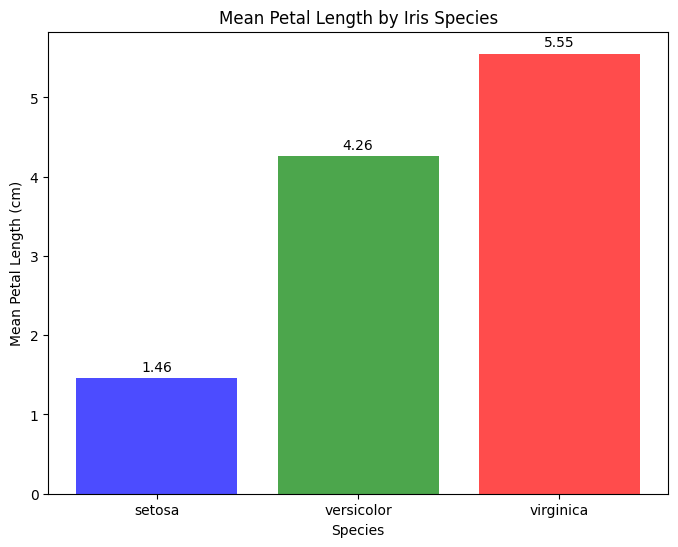

In [17]:
# 1. Calculate the mean petal length for each species
mean_petal_length = df.groupby('species')['petal length (cm)'].mean()

# 2. Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# The bar function is used to create the bar chart
# x-axis are the species names, y-axis are the mean values
bars = ax.bar(mean_petal_length.index, mean_petal_length.values, color=['blue', 'green', 'red'], alpha=0.7)

# 3. Customize the plot
ax.set_title('Mean Petal Length by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Petal Length (cm)')

# Optional: Add the mean value on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}',
            ha='center', va='bottom')

# Display the plot
plt.show()

Observation: The bar chart visually confirms that the species are well-separated based on this feature, with Iris-virginica having the largest mean petal length and Iris-setosa the smallest.


###10) Correlation heatmap (feature correlation)

Goal: spot strongly/weakly correlated numeric features.

The heatmap displays the pairwise Pearson correlation coefficient for all four numerical features in the dataset. Values close to $1$ (red) indicate a strong positive correlation, while values close to $-1$ (blue) indicate a strong negative correlation.

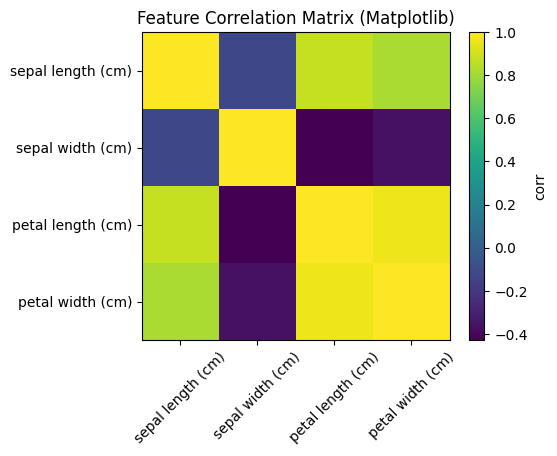

In [18]:
corr = df.iloc[:, :-1].corr()   # drop species
plt.figure(figsize=(5,4))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='corr')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix (Matplotlib)')
plt.show()



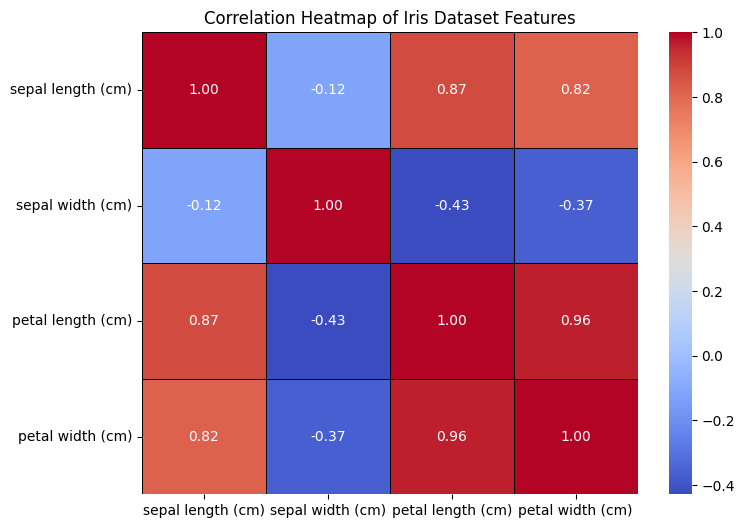

In [19]:
# Correlation Heatmap (using Seaborn)
# Select only the numeric features for correlation calculation
numeric_df = df.drop(columns=['species'])
correlation_matrix = numeric_df.corr()

# Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,     # Display the correlation values on the map
    cmap='coolwarm', # Color scheme: cool for negative, warm for positive
    fmt=".2f",      # Format annotations to two decimal places
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

###11 Save Figures
Goal: export a plot to PNG (or PDF/SVG).

To save the plots we generated earlier (Scatter Plot, Histogram, Box Plot, Violin Plot, and Heatmap) using Matplotlib's plt.savefig() function.

You simply replace plt.show() with plt.savefig('your_filename.png') within your plotting code blocks.

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title('Petal Length vs Width')
plt.savefig('iris_petal_scatter.png', dpi=300, bbox_inches='tight')
plt.close()   # close when running scripts


KeyError: 'petal_length'

<Figure size 600x400 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Preparation ---
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target).apply(lambda x: iris.target_names[x])

setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

# =======================================================
## 1. Scatter Plot (Petal Length vs. Petal Width)
# =======================================================
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label='Setosa', marker='o', color='blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label='Versicolor', marker='s', color='green')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label='Virginica', marker='^', color='red')
ax.set_title('Iris Petal Length vs Petal Width by Species')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('iris_scatter_plot.png')
plt.close(fig) # Close the figure to free up memory

# =======================================================
## 2. Histogram (Sepal Length Distribution)
# =======================================================
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(setosa['sepal length (cm)'], bins=10, alpha=0.6, label='Setosa')
plt.hist(versicolor['sepal length (cm)'], bins=10, alpha=0.6, label='Versicolor')
plt.hist(virginica['sepal length (cm)'], bins=10, alpha=0.6, label='Virginica')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Save the plot
plt.savefig('iris_histogram.png')
plt.close(fig)

# =======================================================
## 3. Box Plot (Sepal Width Comparison)
# =======================================================
sepal_width_data = [
    df[df['species'] == 'setosa']['sepal width (cm)'],
    df[df['species'] == 'versicolor']['sepal width (cm)'],
    df[df['species'] == 'virginica']['sepal width (cm)']
]
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(sepal_width_data, patch_artist=True, medianprops={'color': 'black'})
ax.set_xticklabels(df['species'].unique())
ax.set_title('Box Plot of Sepal Width by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('iris_box_plot.png')
plt.close(fig)

# =======================================================
## 4. Violin Plot (Petal Length Distribution - using Seaborn)
# =======================================================
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='species', y='petal length (cm)', data=df, inner='quartile', palette='viridis', ax=ax)
ax.set_title('Violin Plot of Petal Length by Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('iris_violin_plot.png')
plt.close(fig)

# =======================================================
## 5. Correlation Heatmap (using Seaborn)
# =======================================================
numeric_df = df.drop(columns=['species'])
correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black',
    ax=ax
)
ax.set_title('Correlation Heatmap of Iris Dataset Features')

# Save the plot
plt.savefig('iris_correlation_heatmap.png')
plt.close(fig)

print("All five plots have been saved as PNG files in the current directory.")

###Extra Visualization - Line Plot

A line plot isn't typically used to show relationships between features for this kind of dataset, but it can be used to visualize the value of a single feature (Petal Length) across the order of the samples in the dataset, colored by species.

In [ ]:
# --- Line Plot Code ---
plt.figure(figsize=(12, 6))

species_colors = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}

for species_name, color in species_colors.items():
    # Filter data for the current species
    species_data = df[df['species'] == species_name]

    # Plot Petal Length against its original index (sample order)
    plt.plot(species_data.index, species_data['petal length (cm)'],
             label=species_name,
             color=color,
             alpha=0.7,
             linestyle='-')

plt.title('Line Plot of Petal Length Across Dataset Samples by Species')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot
plt.savefig('iris_line_plot.png')
plt.show()

A bubble plot is essentially a scatter plot where a third variable (and sometimes a fourth) is represented by the size of the marker (bubble).

In this plot:

X-axis: sepal length (cm)

Y-axis: sepal width (cm)

Bubble Size (s): petal length (cm) (scaled up for visibility)

Bubble Color (c): species

This visualization allows you to see how sepal dimensions relate to petal size and species simultaneously.

In [ ]:
# --- Bubble Plot Code ---
plt.figure(figsize=(10, 8))

# Create a temporary 'target' column for color mapping
df['target'] = iris.target

# Create the scatter plot
scatter = plt.scatter(x=df['sepal length (cm)'],
                      y=df['sepal width (cm)'],
                      s=df['petal length (cm)'] * 50, # Size factor for visibility
                      c=df['target'],                  # Color based on target
                      cmap='viridis',
                      alpha=0.6,
                      edgecolors='w',
                      linewidth=0.5)

# Create a legend for the colors (Species)
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Species",
                     labels=iris.target_names,
                     loc="lower left")
plt.gca().add_artist(legend1)

# Create a legend for the sizes (Petal Length)
# This uses specific points for the size legend
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[1, 2, 4, 6])
legend2 = plt.legend(handles, ['<1cm', '2cm', '4cm', '>6cm'],
                     loc="upper right",
                     title="Petal Length (cm)")

plt.title('Bubble Plot: Sepal Dimensions, Petal Length as Bubble Size')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True, linestyle='--', alpha=0.4)

# Save the plot
plt.savefig('iris_bubble_plot.png')
plt.show()